# LCD digits dataset shows NMF parts-based decomposition

Original notebook: https://gist.github.com/benjaminwilson/b25a321f292f98d74269b83d4ed2b9a8#file-lcd-digits-dataset-nmf-ipynb

In [2]:
length = 4  # length of any LCD cell ("stroke")
shape = (2 * length + 5, length + 4)  # shape of the images

In [3]:
from matplotlib import pyplot as plt

def show_as_image(vector):
    """
    Given a 1d vector representing an image, display that image in 
    black and white.  If there are negative values, then use red for 
    that pixel.
    (displaying negative pixel values in red allows e.g. visual contrasting
    of PCA and NMF components)
    """
    bitmap = vector.copy().reshape(shape)  # make a square array
    bitmap /= np.abs(vector).max()  # normalise (a copy!)
    bitmap = bitmap[:,:,np.newaxis]
    rgb_layers = [np.abs(bitmap)] + [bitmap.clip(0)] * 2
    rgb_bitmap = np.concatenate(rgb_layers, axis=-1)
    plt.figure(figsize=(2, 1))
    plt.imshow(rgb_bitmap, interpolation='nearest')
    plt.xticks([])
    plt.yticks([])
    plt.show()

In [4]:

import numpy as np

def vertical_stroke(rightness, downness):
    """
    Return a 2d numpy array representing an image with a single vertical stroke in it.
    `rightness` and `downness` are values from [0, 1] and define the position of the vertical stroke.
    """
    i = (downness * (length + 1)) + 2
    j = rightness * (length + 1) + 1
    x = np.zeros(shape=shape, dtype=np.float64)
    for delta in range(length):
        x[i + delta, j] = 1.
    return x

def horizontal_stroke(downness):
    """
    Analogue to vertical_stroke, but it returns horizontal strokes.
    `downness` is here a value in [0, 1, 2].
    """
    i = (downness * (length + 1)) + 1
    x = np.zeros(shape=shape, dtype=np.float64)
    for j in range(length):
        x[i, 2 + j] = 1.
    return x

print(horizontal_stroke(0))

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


In [5]:
strokes = [horizontal_stroke(k) for k in range(3)] + [vertical_stroke(k, l) for k in range(2) for l in range(2)]

In [6]:
import random

def random_composition():
    """
    Return a random composition of 2, 3, 4, or 5 strokes as a single 2d numpy array.
    (So not guaranteed to look like a real digit!)
    """
    x = np.zeros(shape=shape, dtype=np.float64)
    num_strokes = random.choice([2, 3, 4, 5])
    sample = random.sample(strokes, num_strokes) # without replacement
    for atom in sample:
        x += atom
    return x

In [7]:
bitmap = random_composition()
print(bitmap)

[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  0.  1.  1.  1.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


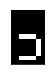

In [8]:
show_as_image(bitmap.flatten())

In [9]:
N = 200
samples = [random_composition().flatten() for _ in range(N)]
X = np.vstack(samples)
print(X.shape)

(200, 104)


In [10]:
from sklearn.decomposition import NMF

model = NMF(n_components=7)
model.fit(X)
X_transformed = model.transform(X)

In [ ]:
for component in model.components_:
    show_as_image(component)

In [ ]:
digit7 = horizontal_stroke(0) + vertical_stroke(1, 0) + vertical_stroke(1, 1)
show_as_image(digit7)

In [13]:
model.transform([digit7.flatten()])

NameError: name 'model' is not defined

## Demonstration that PCA does not!

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
pca.fit(X)

ImportError: No module named 'sklearn'

In [15]:
for component in pca.components_:
    show_as_image(component)

NameError: name 'pca' is not defined

## Generate the dataset

In [16]:
N = 200
samples = [random_composition().flatten() for _ in range(N)]
X = np.vstack(samples)
print(X.shape)

(200, 104)


In [17]:
import tensorflow as tf

import keras
from keras.layers import Embedding, Reshape, Dense, Activation
from keras.models import Sequential
from keras.constraints import nonneg

from keras import backend as K

sess = tf.InteractiveSession()
K.set_session(sess)

print(tf.__version__)
print(keras.__version__)


n_images, n_pixels = X.shape
K = embedding_size = 7


0.12.1
1.2.1


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [55]:
### EXERCISE 
# initialise a 
# model = Sequential(...)
model = Sequential()
weights_contraint = nonneg()
image_to_embedding = Embedding(n_images, K, input_length=1, W_constraint=weights_contraint)
model.add(image_to_embedding)
model.add(Reshape((K,)))
model.add(Dense(output_dim=n_pixels, input_dim=K, bias=False, W_constraint=weights_contraint))
# with all the 3 layers listed above
# You can test it by doing 
# show_as_image(X[1])
# show_as_image(model.predict(np.array([[0]])))
# which should show some random prediction as the model is not trained yet

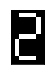

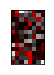

In [56]:
show_as_image(X[1])
show_as_image(model.predict(np.array([1])))

In [57]:
model.compile(optimizer='Adam',
              loss='mean_squared_error') # the way you compare the ground truth and result

In [58]:
X_image_ids = np.arange(n_images)
X_image_ids

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [65]:
model.fit(x=X_image_ids, y=X, batch_size=n_images, verbose=0, nb_epoch=5000)

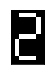

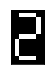

In [66]:
show_as_image(X[1])
show_as_image(model.predict(np.array([1])))

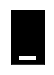

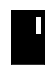

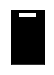

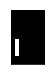

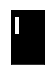

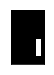

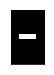

In [67]:
for component in model.layers[2].weights[0].eval():
    show_as_image(component)